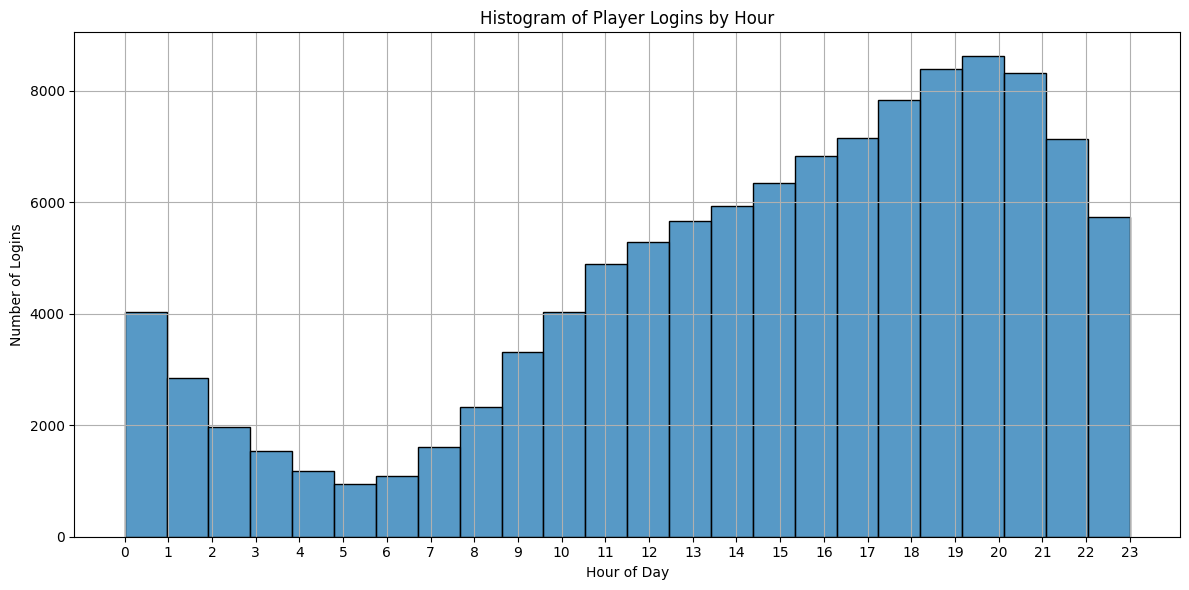

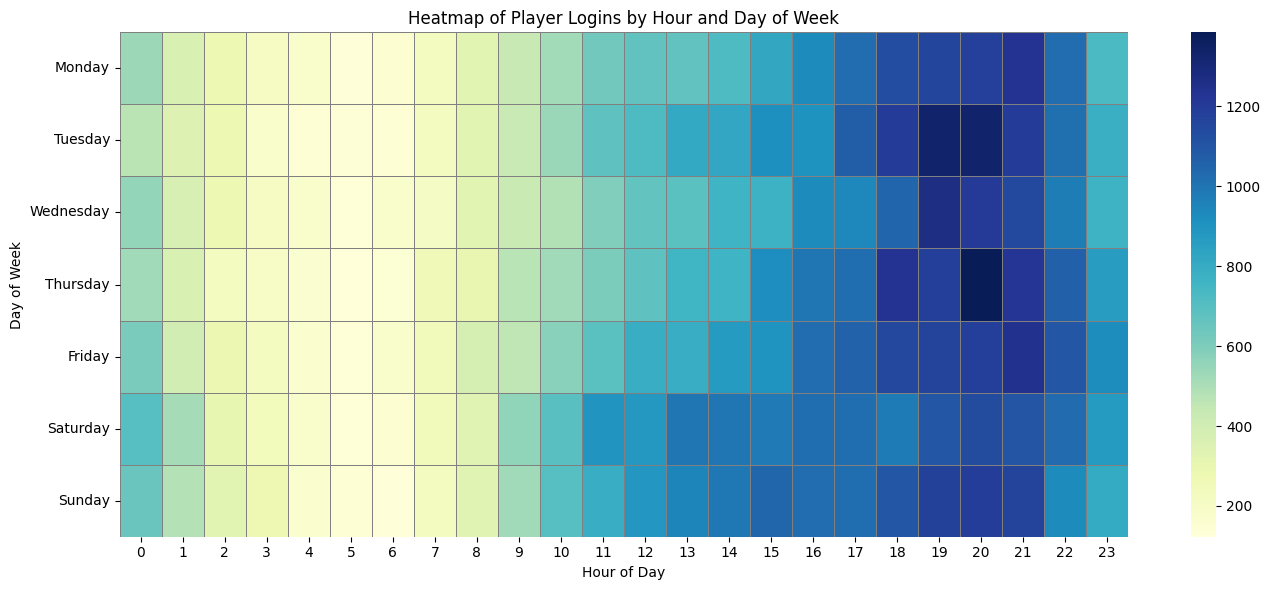

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/player_logged_in.csv')

#Converts the login time to datetime
df['Time'] = pd.to_datetime(df['Time'])

#Extracts the hour of the day (0–23)
df['Hour'] = df['Time'].dt.hour




#Histogram: Player logins by hour
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'], bins=24, kde=False)
plt.title('Histogram of Player Logins by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logins')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()




#Heatmap: Logins by Hour and Day of Week
df['DayOfWeek'] = df['Time'].dt.day_name()

# Create a pivot table: rows = day, cols = hour
heatmap_data = df.pivot_table(index='DayOfWeek', columns='Hour', values='pid', aggfunc='count').fillna(0)

# Reorder days to start from Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Player Logins by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()
